In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import umap
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import seaborn as sns
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


In [1]:
!pip install umap-learn

     |████████████████████████████████| 69 kB 1.7 MB/s  eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67950 sha256=88835cc7ef12c743768d651e39742df707f75a93dfa9c265c63028970e7d142b
  Stored in directory: /home/ec2-user/.cache/pip/wheels/22/ce/3d/75f6600b4d93c851021aceeec51b7b330c0ad4d9692e69be6a
Successfully built umap-learn
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [3]:
s3_path_embeddings_df = "s3://lgo-theses-test/dict_all_embeddings.csv"

In [10]:
specter_embeddings_df = pd.read_csv(s3_path_embeddings_df)

In [13]:
specter_embeddings_df['thesis_id']= specter_embeddings_df['Unnamed: 0']
specter_embeddings_df = specter_embeddings_df.drop(columns=['Unnamed: 0'])

In [7]:
'''with open('dict_all_embeddings.json') as json_file:
    json_data = json.load(json_file)'''

In [8]:
'''embeddings_df = pd.DataFrame.from_dict(json_data, orient='index')'''

In [9]:
#embeddings_df.to_csv(s3_path_embeddings_df)

In [16]:
merged_df_path = "s3://lgo-theses-test/merged_mimo_df.csv"

In [17]:
thesis_df = pd.read_csv(merged_df_path)

In [19]:
thesis_df['thesis_id']=thesis_df['Unnamed: 0']
thesis_df = thesis_df.drop(columns=['Unnamed: 0'])

Clean up duplicates from both specter embeddings and the thesis metadata

In [31]:
dupes_df = thesis_df[thesis_df.duplicated(subset=['filenames'],keep=False)]
dupes_ids = list(dupes_df.thesis_id)

In [33]:
thesis_df_dupes_dropped = thesis_df[~thesis_df['thesis_id'].isin(dupes_ids)]

In [ ]:
specter_embeddings_df_dupes_dropped = specter_embeddings_df[~specter_embeddings_df['thesis_']]

In [111]:
reducer = umap.UMAP()

In [12]:
embedding = reducer.fit_transform(embeddings_df)
embedding.shape

(1228, 2)

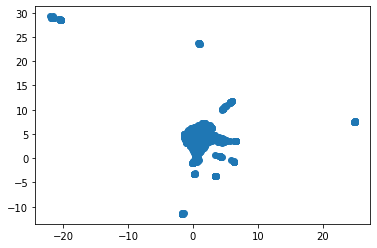

In [13]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])

In [14]:
!pip install datashader

     |████████████████████████████████| 15.5 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 9.1 MB/s  eta 0:00:01
     |████████████████████████████████| 704 kB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 45.5 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 14.5 MB/s eta 0:00:01
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59427 sha256=12c01dbeaa8f111111cdf0bc50d55e8231554dca5625639b0e03969f12153ae1
  Stored in directory: /home/ec2-user/.cache/pip/wheels/81/61/fc/7d268954f6907b2a547c7895012769cde53af58f1aaf95a54c
Successfully built datashape
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [15]:
!pip install holoviews

     |████████████████████████████████| 4.2 MB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 44.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 48.9 MB/s eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=65fb12fb2f56e9c13d6b0e603bc3ccb815846d2409db57b3cb91c9d4d4f10c4a
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5a/91/69/b72c84a8ba487df5d7d376c4bcedc9077d14b32511069187e7
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.0.1
    Uninstalling bokeh-2.0.1:
      Successfully uninstalled bokeh-2.0.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [16]:
import umap.plot

In [19]:
#filter thesis_df to only the indices of the embeddings_df
thesis_df_filtered = thesis_df[thesis_df['paper_id'].isin(all_paper_ids)]

In [20]:
thesis_df_filtered.head()

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,PERSON_ID,FIRST_NAME_y,LAST_NAME_y,CLASS_y,ENG_DEPT,INTERNSHIP_COMPANY,paper_id
0,0,Accelerating the Development of Complex Produc...,Dawson FINAL Thesis Text,Benjamin,Dawson,Accelerating the Development of Complex Produc...,2011,Dawson FINAL Thesis Text.pdf,Accelerating the Development of Complex Produc...,979234733.0,40058,Benjamin,Dawson,2011,Engineering Systems Division,Spirit AeroSystems Inc.,0
1,1,Constraint Analysis and Throughput Improvement...,valdes03thesis,Jose,Valdes,Constraint Analysis And Throughput Improvement...,2003,valdes03thesis.pdf,Constraint Analysis and Throughput Improvement...,921923011.0,4401,Jose,Valdes,2003,Mechanical Engineering,NaN,1
2,2,Product Development Process Postmortem Assessm...,kacand97,Peter,Kacandes,Product Development Process Postmortem Assessment,1997,kacand97.pdf,Product Development Process Postmortem Assessm...,958727061.0,3398,Peter,Kacandes,1997,Electrical Engineering and Computer Science,NaN,2
3,3,Inventory Optimization Model for NIKE’s Long L...,20150414 MIT Thesis - John Kang v24 Single spaced,John,Kang,Inventory Optimization Model for NIKEs Long-L...,2015,20150414 MIT Thesis - John Kang v24 Single spa...,Inventory Optimization Model for NIKE’s Long L...,962462852.0,46191,John,Kang,2015,Engineering Systems Division,Nike,3
4,4,This page has been intentionally left blank. ...,Thesis - Supply Chain Risk Management - Daniel...,Daniel,Schoerner,Developing a Process for Supply Chain Risk Man...,2009,Thesis - Supply Chain Risk Management - Daniel...,This page has been intentionally left blank. ...,929632340.0,32882,Daniel,Schoerner,2009,Electrical Engineering and Computer Science,Cisco Systems Incorporated,4


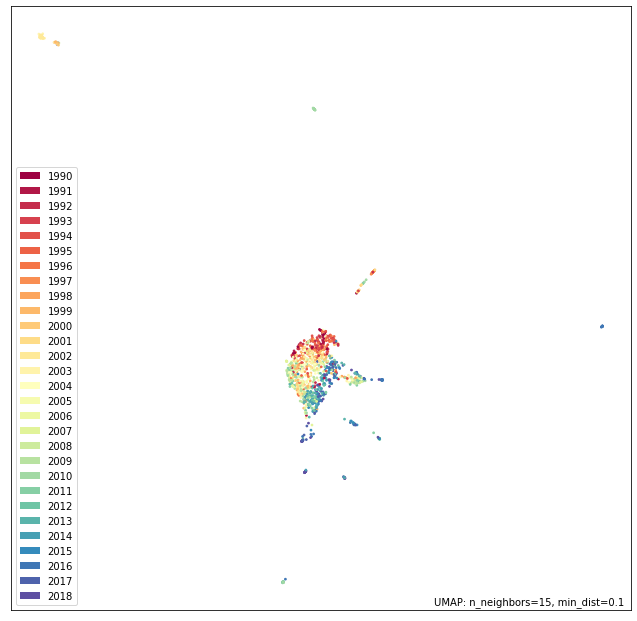

In [33]:
umap.plot.points(reducer, labels= thesis_df_filtered['CLASS_x'])


In [22]:
from bokeh.plotting import show, save, output_notebook, output_file

In [31]:
p = umap.plot.interactive(reducer, labels=thesis_df_filtered['CLASS_x'], hover_data=hover_data, point_size=2)
output_notebook()
show(p)

Loading BokehJS ...

In [24]:
aero =['Spirit AeroSystems Inc.','United Technologies Corporation','Raytheon-Space and Airborne Systems','The Boeing Company',
      'United Technologies Corporation - Pratt & Whitney','Raytheon Company','Bell Helicopter','United Technologies Corporation - Sikorsky Aircraft',
      'Raytheon - Integrated Defense Systems','United Technologies Corporation - Aerospace Systems','General Dynamics Corporation','Lincoln Laboratory ',
      'Northrop Grumman Corporation','GE Aviation','Raytheon - Intelligence and Information Systems','NASA']

healthcare =['Broad Institute','Amgen Inc.','Genzyme Corporation','Novartis Pharma AG','Johnson & Johnson','Boston Scientific',
            'Novartis Institutes for Biomedical Research, Inc.','Pfizer','Sanofi','Novartis Vaccine and Diagnostics',
            'Massachusetts General Hospital','Beth Israel Deaconess Medical Center','Quest Diagnostics','Genentech',
            'Novartis Biologics','Danaher ','PerkinElmer, Inc.']

hitech=['Honeywell International Incorporated','Intel Corporation','Cisco Systems Incorporated','SanDisk Corporation',
       'Cisco/Flextronics','Hewlett-Packard Company','Digital Equipment Corporation','Lucent Technologies Incorporated',
       'Flextronics','Motorola Incorporated','Nokia Corporation', 'Polaroid Corporation','3M Company','iRobot','Eastman Kodak Company',
       'Dell, Inc.','MASCHINENFABRIK REINHAUSEN GMBH','MASCHINENFABRIK REINHAUSEN','Teradyne Incorporated','ABB ',
       'ABB Limited','ATI Technologies, Inc.','Axcelis Technologies Incorporated','American Industrial Partners']

auto=['Ford Motor Company','Harley-Davidson Motor Company','General Motors Corporation','Goodyear Tire and Rubber Company',
     'Caterpillar','American Axle and Manufacturing','Valeo SA']

attire = ['Nike','Li & Fung','Zara (Inditex, S.A.)']

utilities = ['National Grid', 'Pacific Gas & Electric','Schlumberger','Siemens Power Transmission and Distribution','Verizon']

consumer = ['Amazon ','Kimberly Clark Corp.','The Procter & Gamble Company','Pepsi Bottling Group','Pepsi Bottling Company',
           'C&S Wholesale Grocers','Amazon.com Incorporated']

rawmaterials=['H.C. Starck GmbH','Aluminum Company of America','BMHC']

mapping_dict = {'aero':aero, 'healthcare':healthcare, 'hitech':hitech,'auto':auto,'attire':attire,'utilities':utilities,
               'consumer':consumer,'rawmaterials':rawmaterials}
industries= ['aero','healthcare','hitech','auto','attire','utilities','consumer','rawmaterials']

In [25]:
#Swap keys for values so that each partner company maps to an industry
new_dict = {k: oldk for oldk, oldv in mapping_dict.items() for k in oldv}
thesis_df_filtered['industry'] = thesis_df_filtered.INTERNSHIP_COMPANY
thesis_df_filtered['industry'] = thesis_df_filtered.INTERNSHIP_COMPANY.map(new_dict)
thesis_df_filtered["industry"] = thesis_df_filtered["industry"].astype('category')
thesis_df_filtered["industry_cat"] = thesis_df_filtered["industry"].cat.codes

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [26]:
import numpy as np
#thesis_df_filtered = thesis_df_filtered.replace(np.nan, 'empty', regex=True)
thesis_df_filtered['industry'] = thesis_df_filtered['industry'].cat.add_categories("notknown").fillna('notknown')

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [27]:
hover_data = thesis_df_filtered[['CLASS_x', 'THESIS_TITLE', 'ENG_DEPT','INTERNSHIP_COMPANY', 'industry']]

In [30]:
hover_data.head()

,CLASS_x,THESIS_TITLE,ENG_DEPT,INTERNSHIP_COMPANY,industry
0,2011,Accelerating the Development of Complex Produc...,Engineering Systems Division,Spirit AeroSystems Inc.,aero
1,2003,Constraint Analysis And Throughput Improvement...,Mechanical Engineering,NaN,notknown
2,1997,Product Development Process Postmortem Assessment,Electrical Engineering and Computer Science,NaN,notknown
3,2015,Inventory Optimization Model for NIKEs Long-L...,Engineering Systems Division,Nike,attire
4,2009,Developing a Process for Supply Chain Risk Man...,Electrical Engineering and Computer Science,Cisco Systems Incorporated,hitech


In [58]:
thesis_df_mine = thesis_df_filtered[thesis_df_filtered['LAST_NAME_x']=="Ingram"]

In [59]:
thesis_df_mine

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,PERSON_ID,FIRST_NAME_y,LAST_NAME_y,CLASS_y,ENG_DEPT,INTERNSHIP_COMPANY,paper_id,industry,industry_cat
325,325,Electric Utility Storm Restoration – Crew Work...,KIngram16thesis,Christopher,Ingram,Electric Utility Storm Restoration  Crew Work...,2016,KIngram16thesis.pdf,Electric Utility Storm Restoration – Crew Work...,916143589.0,48053,Christopher,Ingram,2016,Engineering Systems Division,National Grid,325,utilities,7


In [62]:
#others_to_look_at= ['14','323','849', '932']

#others_to_look_at = ['1300', '390', '747', '315']
others_to_look_at = ['325','497', '743', '646', '540']

In [63]:
thesis_df_related = thesis_df_filtered[thesis_df_filtered['Unnamed: 0'].isin(others_to_look_at)]

In [64]:
thesis_df_related

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,PERSON_ID,FIRST_NAME_y,LAST_NAME_y,CLASS_y,ENG_DEPT,INTERNSHIP_COMPANY,paper_id,industry,industry_cat
325,325,Electric Utility Storm Restoration – Crew Work...,KIngram16thesis,Christopher,Ingram,Electric Utility Storm Restoration  Crew Work...,2016,KIngram16thesis.pdf,Electric Utility Storm Restoration – Crew Work...,916143589.0,48053,Christopher,Ingram,2016,Engineering Systems Division,National Grid,325,utilities,7
497,497,Optimizing Emergency Response Crew Allocation ...,Kurdi Mohammed Thesis,Mohamed,Kurdi,Optimizing Emergency Response Crew Allocation ...,2017,Kurdi Mohammed Thesis.pdf,Optimizing Emergency Response Crew Allocation ...,926661955.0,49479,Mohamed,Kurdi,2017,Engineering Systems Division,Pacific Gas & Electric,497,utilities,7
540,540,Allocation Strategy for Production Network D...,Allocation-strategy-for-production-network-des...,Roy,Lehman III,Allocation Strategy for Production Network Des...,2011,Allocation-strategy-for-production-network-des...,Allocation Strategy for Production Network D...,923257091.0,40075,Roy,Lehman III,2011,Engineering Systems Division,Amgen Inc.,540,healthcare,4
646,646,From Plant to Dealer: Improving Route Optimiza...,EK Thesis v4,Elizabeth,Katcoff,From Plant to Dealer: Improving Route Optimiza...,2012,EK Thesis v4.pdf,From Plant to Dealer: Improving Route Optimiza...,974379930.0,41039,Elizabeth,Katcoff,2012,Engineering Systems Division,Nissan-USA,646,notknown,-1
743,743,Predictive Storm Damage Modeling and Optimizin...,Whipple_NG_Thesis_v6,Sean,Whipple,Predictive Storm Damage Modeling and Optimizin...,2014,Whipple_NG_Thesis_v6.pdf,Predictive Storm Damage Modeling and Optimizin...,922970944.0,44913,Sean,Whipple,2014,Engineering Systems Division,National Grid,743,utilities,7


In [44]:
pairwise_top = pd.DataFrame(
    squareform(pdist(embeddings_df, metric='cosine')),
    columns = embeddings_df.index,
    index = embeddings_df.index
)


In [60]:
pairwise_top['325']

0       0.290270
1       0.223649
2       0.312108
3       0.192775
4       0.368423
          ...   
1303    0.269356
1304    0.264105
1305    0.230918
1306    0.238826
1307    0.239126
Name: 325, Length: 1228, dtype: float64

In [61]:
pairwise_top.sort_values(by=['325'])
#others_to_look_at = ['325','497', '743', '646', '540']

,0,1,2,3,4,5,6,7,8,9,...,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
325,0.290270,0.223649,0.312108,0.192775,0.368423,0.408063,0.189643,0.243602,0.225846,0.231715,...,0.353929,0.296101,0.245975,0.271478,0.213094,0.269356,0.264105,0.230918,0.238826,0.239126
497,0.291613,0.235689,0.308795,0.215556,0.390337,0.389483,0.203209,0.258147,0.268983,0.237465,...,0.344733,0.365523,0.251499,0.316274,0.230830,0.272158,0.265138,0.251620,0.296597,0.260085
743,0.325379,0.266041,0.316420,0.230370,0.415837,0.405578,0.259981,0.250458,0.321905,0.297082,...,0.350295,0.321215,0.252378,0.357852,0.256996,0.275626,0.313912,0.270534,0.304258,0.316437
646,0.243674,0.172909,0.313126,0.160473,0.322834,0.330180,0.158588,0.209286,0.212590,0.180668,...,0.367567,0.304389,0.226491,0.250762,0.228165,0.217693,0.235967,0.212143,0.211416,0.177728
540,0.207310,0.198368,0.290631,0.134118,0.280567,0.354405,0.135030,0.178781,0.197768,0.150933,...,0.299259,0.243035,0.205090,0.275124,0.151728,0.176348,0.211763,0.162016,0.208422,0.195093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.876007,0.871794,0.921627,0.869750,0.834694,0.914187,0.873974,0.880995,0.899034,0.903233,...,0.888623,0.893119,0.882640,0.907582,0.884337,0.939523,0.880941,0.902770,0.940222,0.861168
162,0.876007,0.871794,0.921627,0.869750,0.834694,0.914187,0.873974,0.880995,0.899034,0.903233,...,0.888623,0.893119,0.882640,0.907582,0.884337,0.939523,0.880941,0.902770,0.940222,0.861168
221,0.876007,0.871794,0.921627,0.869750,0.834694,0.914187,0.873974,0.880995,0.899034,0.903233,...,0.888623,0.893119,0.882640,0.907582,0.884337,0.939523,0.880941,0.902770,0.940222,0.861168
1088,0.817331,0.759749,0.859884,0.877125,0.802083,0.809171,0.879270,0.839749,0.957873,0.842719,...,0.901419,0.930091,0.849376,0.883923,0.899756,0.848533,0.851401,0.880585,0.893679,0.831613


In [ ]:
#Find all the duplicates from the thesis_df_filtered dataframe and then drop those from the embeddings_df

In [ ]:
indices_to_drop = [59,60,61,62,63,]

In [137]:
dupes = thesis_df_filtered[thesis_df_filtered.duplicated(subset=['filenames'],keep=False)]

In [138]:
dupes.head()

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,PERSON_ID,FIRST_NAME_y,LAST_NAME_y,CLASS_y,ENG_DEPT,INTERNSHIP_COMPANY,paper_id,industry,industry_cat,thesis_id
59,59,Supply Chain Network Strategy for Consumer Med...,shaidar16thesis,Samer,Haidar,No Title Available,2016,shaidar16thesis.pdf,Supply Chain Network Strategy for Consumer Med...,919334865.0,51104,Shai,Dekel,2018,Civil and Environmental Engineering,National Grid,59,utilities,7,59
60,60,Supply Chain Network Strategy for Consumer Med...,shaidar16thesis,Samer,Haidar,No Title Available,2016,shaidar16thesis.pdf,Supply Chain Network Strategy for Consumer Med...,927626907.0,50615,Wade,McElroy,2018,Mechanical Engineering,Pacific Gas & Electric,60,utilities,7,60
61,61,Supply Chain Network Strategy for Consumer Med...,shaidar16thesis,Samer,Haidar,No Title Available,2016,shaidar16thesis.pdf,Supply Chain Network Strategy for Consumer Med...,921977089.0,50598,Lila,Fridley,2018,Civil and Environmental Engineering,"Zara (Inditex, S.A.)",61,attire,1,61
62,62,Supply Chain Network Strategy for Consumer Med...,shaidar16thesis,Samer,Haidar,No Title Available,2016,shaidar16thesis.pdf,Supply Chain Network Strategy for Consumer Med...,910250610.0,47990,Rashmeet,Sangari,2016,Engineering Systems Division,Amgen Inc.,62,healthcare,4,62
63,63,Supply Chain Network Strategy for Consumer Med...,shaidar16thesis,Samer,Haidar,No Title Available,2016,shaidar16thesis.pdf,Supply Chain Network Strategy for Consumer Med...,997005957.0,48115,Samer,Haidar,2016,Mechanical Engineering,Johnson & Johnson,63,healthcare,4,63


In [148]:
dupes_list = list(dupes.index.values)

In [186]:
embeddings_df['index1'] = embeddings_df.index

In [187]:
embeddings_df.shape

(1228, 769)

In [188]:
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,index1
0,0.855099,-0.188821,1.438922,4.185352,-0.572971,1.410689,-3.375101,0.138178,0.932003,-1.447088,...,2.250733,0.360158,-1.351545,-0.329146,-1.389120,-2.892578,3.282118,-5.888918,2.931910,0
1,0.362813,-0.544485,-0.368870,2.670815,-4.246541,-2.873326,-1.743816,3.569061,3.940951,-0.460355,...,0.751344,2.573723,-0.472357,-3.572804,-3.047930,1.154904,2.231155,-2.049390,1.408489,1
2,3.596441,-2.672838,-0.296180,-0.164530,-0.816349,1.099923,-7.562880,7.268902,2.781383,-1.674825,...,3.620482,2.447057,-0.894995,-3.821611,-1.733846,-2.415118,5.050387,-4.361850,3.607909,2
3,1.867486,0.716863,-1.080809,5.585783,-1.984223,-3.908912,-3.865032,-1.173760,1.244665,-2.505109,...,0.237296,1.368325,-1.316533,-4.660244,-0.961986,-0.979013,3.641799,-3.433619,0.627164,3
4,2.425460,-0.476791,-1.909145,5.265825,-1.613476,-1.670118,-2.642925,0.272050,0.942406,-0.804458,...,1.087376,1.904118,2.156105,-4.385923,-3.183031,-2.289857,3.399805,-6.756292,2.883253,4


In [189]:
dupes_list

[59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 23

In [178]:
test_list = [59,60,61]

In [179]:
embeddings_df_clean = embeddings_df[~embeddings_df.index1.isin(test_list)]

#thesis_df_filtered_clean = thesis_df_filtered[~thesis_df_filtered['thesis_id'].isin(dupes_list)]

In [182]:
embeddings_df_clean.shape

(1227, 769)

In [184]:
embeddings_df_clean.index1[58:62]

67    67
68    68
69    69
70    70
Name: index1, dtype: object

In [173]:
thesis_df_filtered.shape

(1228, 20)

In [174]:
embeddings_df.shape

(1227, 769)

In [169]:
embeddings_df_clean.shape, thesis_df_filtered_clean.shape

((1227, 769), (1042, 20))

In [72]:
db = DBSCAN(eps=0.3, min_samples=10).fit(embeddings_df)

In [75]:
labels = db.labels_

In [84]:
cluster_labels_df = pd.DataFrame(data=labels)

In [94]:
thesis_df_filtered_merged_clustering = thesis_df_filtered.join(cluster_labels_df)

In [98]:
thesis_df_filtered_merged_clustering['thesis_id']=thesis_df_filtered_merged_clustering['Unnamed: 0']
thesis_df_filtered_merged_clustering['cluster_label']=thesis_df_filtered_merged_clustering[0]

In [99]:
thesis_df_filtered_merged_clustering.head()

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,...,LAST_NAME_y,CLASS_y,ENG_DEPT,INTERNSHIP_COMPANY,paper_id,industry,industry_cat,0,thesis_id,cluster_label
0,0,Accelerating the Development of Complex Produc...,Dawson FINAL Thesis Text,Benjamin,Dawson,Accelerating the Development of Complex Produc...,2011,Dawson FINAL Thesis Text.pdf,Accelerating the Development of Complex Produc...,979234733.0,...,Dawson,2011,Engineering Systems Division,Spirit AeroSystems Inc.,0,aero,0,-1.0,0,-1.0
1,1,Constraint Analysis and Throughput Improvement...,valdes03thesis,Jose,Valdes,Constraint Analysis And Throughput Improvement...,2003,valdes03thesis.pdf,Constraint Analysis and Throughput Improvement...,921923011.0,...,Valdes,2003,Mechanical Engineering,NaN,1,notknown,-1,-1.0,1,-1.0
2,2,Product Development Process Postmortem Assessm...,kacand97,Peter,Kacandes,Product Development Process Postmortem Assessment,1997,kacand97.pdf,Product Development Process Postmortem Assessm...,958727061.0,...,Kacandes,1997,Electrical Engineering and Computer Science,NaN,2,notknown,-1,-1.0,2,-1.0
3,3,Inventory Optimization Model for NIKE’s Long L...,20150414 MIT Thesis - John Kang v24 Single spaced,John,Kang,Inventory Optimization Model for NIKEs Long-L...,2015,20150414 MIT Thesis - John Kang v24 Single spa...,Inventory Optimization Model for NIKE’s Long L...,962462852.0,...,Kang,2015,Engineering Systems Division,Nike,3,attire,1,-1.0,3,-1.0
4,4,This page has been intentionally left blank. ...,Thesis - Supply Chain Risk Management - Daniel...,Daniel,Schoerner,Developing a Process for Supply Chain Risk Man...,2009,Thesis - Supply Chain Risk Management - Daniel...,This page has been intentionally left blank. ...,929632340.0,...,Schoerner,2009,Electrical Engineering and Computer Science,Cisco Systems Incorporated,4,hitech,5,-1.0,4,-1.0


In [102]:
thesis_df_filtered_merged_clustering.groupby('cluster_label')['CLASS_x'].mean()

cluster_label
-1.0    2004.673469
 0.0    2008.750000
 1.0    2017.000000
 2.0    2017.000000
 3.0    2014.000000
 4.0    2011.500000
 5.0    2005.166667
 6.0    2010.000000
 7.0    2018.000000
 8.0    2014.000000
Name: CLASS_x, dtype: float64

In [104]:
thesis_df_filtered_merged_clustering.groupby('cluster_label')['CLASS_x'].std()

cluster_label
-1.0     8.047326
 0.0    10.076375
 1.0     1.032796
 2.0     1.032796
 3.0     2.065591
 4.0     0.516398
 5.0     3.844495
 6.0     8.262364
 7.0     0.000000
 8.0     4.131182
Name: CLASS_x, dtype: float64

In [103]:
thesis_df_filtered_merged_clustering.groupby('cluster_label').count()

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,...,FIRST_NAME_y,LAST_NAME_y,CLASS_y,ENG_DEPT,INTERNSHIP_COMPANY,paper_id,industry,industry_cat,0,thesis_id
cluster_label,,,,,,,,,,,,,,,,,,,,,
-1.0,980,980,980,980,980,980,980,980,980,953,...,980,980,980,980,496,980,980,980,980,980
0.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,10,16,16,16,16,16
1.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,14,16,16,16,16,16
2.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,14,16,16,16,16,16
3.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,14,16,16,16,16,16
4.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,14,16,16,16,16,16
5.0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,42,48,48,48,48,48
6.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,14,16,16,16,16,16
7.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,14,16,16,16,16,16


In [115]:
thesis_df_filtered_merged_clustering[thesis_df_filtered_merged_clustering['cluster_label']==4]

,Unnamed: 0,0,filenames,FIRST_NAME_x,LAST_NAME_x,THESIS_TITLE,CLASS_x,THESIS_TITLE.1,Theses,MIT_ID,...,LAST_NAME_y,CLASS_y,ENG_DEPT,INTERNSHIP_COMPANY,paper_id,industry,industry_cat,0,thesis_id,cluster_label
115,115,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,982866526.0,...,Xia,2011,Engineering Systems Division,United Technologies Corporation - Sikorsky Air...,115,aero,0,4.0,115,4.0
116,116,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,921467079.0,...,Norelli,2010,Engineering Systems Division,Raytheon Company,116,aero,0,4.0,116,4.0
117,117,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,976161734.0,...,Mui,2010,Electrical Engineering and Computer Science,Cisco Systems Incorporated,117,hitech,5,4.0,117,4.0
118,118,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,921820249.0,...,Fung,2006,Electrical Engineering and Computer Science,Eastman Kodak Company,118,hitech,5,4.0,118,4.0
119,119,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,921780829.0,...,Chang,2004,Chemical Engineering,Broad Institute,119,healthcare,4,4.0,119,4.0
120,120,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,926710090.0,...,Piepenbrock,2003,Civil and Environmental Engineering,NaN,120,notknown,-1,4.0,120,4.0
121,121,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,927380025.0,...,Wohl,2002,Civil and Environmental Engineering,ABB Limited,121,hitech,5,4.0,121,4.0
122,122,Achieving and Sustaining an Optimal Product Po...,Hilliardpublic,David,Hilliard,No Title Available,2012,Hilliardpublic.pdf,Achieving and Sustaining an Optimal Product Po...,929400372.0,...,Eckhardt,2002,Chemical Engineering,Teradyne Incorporated,122,hitech,5,4.0,122,4.0
123,123,This page has been intentionally left blank \...,Xia Thesis,Robert,Xia,No Title Available,2011,Xia Thesis.pdf,This page has been intentionally left blank \...,919334865.0,...,Dekel,2018,Civil and Environmental Engineering,National Grid,123,utilities,7,4.0,123,4.0
124,124,This page has been intentionally left blank \...,Xia Thesis,Robert,Xia,No Title Available,2011,Xia Thesis.pdf,This page has been intentionally left blank \...,927626907.0,...,McElroy,2018,Mechanical Engineering,Pacific Gas & Electric,124,utilities,7,4.0,124,4.0
